In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
%matplotlib inline

In [2]:
data = pd.read_csv('Social_Network_Ads.csv')

In [3]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
X = data.iloc[:,2:4].values

In [5]:
X.shape

(400, 2)

In [6]:
Y = data.iloc[:,-1].values

In [7]:
Y.shape

(400,)

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train,Y_test = train_test_split(X,Y,test_size=0.20)

In [9]:
X_train.shape

(320, 2)

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
scaler = StandardScaler()

In [12]:
X_train = scaler.fit_transform(X_train)

In [13]:
X_test = scaler.transform(X_test)

In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
accuracy = []
for i in range(1,26):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,Y_train)
    accuracy.append(accuracy_score(Y_test,knn.predict(X_test)))

In [15]:
len(accuracy)

25

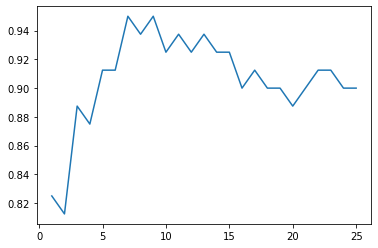

In [16]:
plt.plot(range(1,26),accuracy)

In [17]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=9)

In [18]:
y_pred=knn.predict(X_test)

In [19]:
print(accuracy_score(Y_test,y_pred)*100,'%')

95.0 %


In [20]:
confusion_matrix(Y_test,y_pred)

array([[45,  3],
       [ 1, 31]])

In [21]:
a = np.arange(start=X_train[:,0].min()-1,stop=X_train[:,0].max()+1,step=0.01)
b = np.arange(start=X_train[:,1].min()-1,stop=X_train[:,1].max()+1,step=0.01)

In [22]:
XX,YY=np.meshgrid(a,b)

In [23]:
input_array=np.array([XX.ravel(),YY.ravel()]).T
labels=knn.predict(input_array)

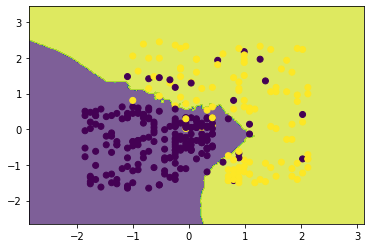

In [24]:
plt.contourf(XX,YY,labels.reshape(XX.shape),alpha=0.7)
plt.scatter(X_train[:,0],X_train[:,1],c=Y_train)